# 공공API  - 관광정보
## 1. 오픈API 정의
 - 오픈: Open, 개방, 공개  
 - API: Application Programming Interface, 응용 프로그램 인터페이스  
 - 오픈 API: 일반적으로 웹 서비스(Web Services)형태로써  특정 기능 혹은 콘텐츠 서비스를 위해 외부에 접근 방법을 공개한 형태  

## 2. 오픈 API 동작 원리(1)
### - 이용자 입장에서 동작 단계
#### >요청(request)하는 단계
- GET방식
- POST방식
    
#### > 결과 (response)값을 받아 해석(parse)하는 단계

## 3. 오픈API 동작원리(2)
- [참고] HTTP 프로토콜을 이용해 클라이언트에서 서버에데이터를 전달하는 방법 

### > GET 방식
 - 링크(link) 할 수 있는 URL을 가지고 있는 것 
 #### [형식] 요청URL?변수1=변수값1&변수2=변수값2...  (‘&’표기로 변수구분) 
 
### > POST 방식
 - 폼(form)을 이용해서 수행(submit)하는 형태 
 - 수행 내용이 (body 안에) 숨겨져서 보내짐 
 - 서버의 값이나 상태를 바꾸기 위해 사용 

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'#한글 깨짐 해결
plt.rcParams['axes.unicode_minus'] = False  #- 깨짐 해결

In [2]:
KEY='Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D'
startDate='20210101'
endDate='20211231'

url1='http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=' +KEY
url2='&numOfRows=1000&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y&eventStartDate='+startDate
url3='&eventStartDate='+endDate
url=url1+url2+url3
print(url)

http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D&numOfRows=1000&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y&eventStartDate=20210101&eventStartDate=20211231


In [3]:
xml=requests.get(url)
soup=bs(xml.text,'html.parser')

C:\Users\LG\anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [7]:
soup

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header>
<resultcode>0000</resultcode>
<resultmsg>OK</resultmsg>
</header><body><items>
<item>
<addr1>경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터</addr1>
<addr2></addr2>
<booktour></booktour>
<cat1>A02</cat1>
<cat2>A0208</cat2>
<cat3>A02081300</cat3>
<contentid>2704330</contentid>
<contenttypeid>15</contenttypeid>
<createdtime>20210120002643</createdtime>
<eventstartdate>20210116</eventstartdate>
<eventenddate>20211231</eventenddate>
<firstimage>http://tong.visitkorea.or.kr/cms/resource/26/2704326_image2_1.JPG</firstimage>
<firstimage2>http://tong.visitkorea.or.kr/cms/resource/26/2704326_image2_1.JPG</firstimage2>
<mapx>127.6574135888</mapx>
<mapy>37.5145504080</mapy>
<mlevel>6</mlevel>
<modifiedtime>20210224090007</modifiedtime>
<readcount>0</readcount>
<areacode>31</areacode>
<sigungucode>19</sigungucode>
<tel>031-775-5205</tel>
<title>가족끼리 빙어체험 2021</title>
</item>
<item>
<addr1>경기도 가평군 가평읍 가평제방길 119</addr1>
<addr2></addr2>
<book

In [8]:
data=soup.find_all('item')
len(data)

1000

In [9]:
data=soup.find_all('item')
items=['title','addr1','eventstartdate','eventenddate','areacode','cat1','cat2','cat3','mapx','mapy','tel']
res=[]
for i in data:
    ls={}
    for j in items:
        try:
            ls[j]=i.find(j).text
        except:
            ls[j]=None
    res.append(ls)

In [10]:
df=pd.DataFrame(res)
df

title                             addr1  \
0              가족끼리 빙어체험 2021  경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터   
1               가평씽씽송어축제 2021             경기도 가평군 가평읍 가평제방길 119   
2                  감악산 꽃&별 여행                  거창군 신원면 덕산리 산 57   
3                     강남디자인위크                     서울특별시 강남구 논현동   
4                     강동북페스티벌                            온라인 개최   
..                        ...                               ...   
995      2022 예술한류 콜로키엄 [상반기]  서울특별시 성북구 화랑로32길 146-37 한국예술종합학교   
996           2022 온라인 논산딸기축제             충청남도 논산시 부적면 백일헌로 (3)   
997           2022 온라인 영동곶감축제                            온라인 개최   
998          2022 울산 워터버블페스티벌         울산광역시 중구 성남동 337 태화강 체육공원   
999  2022 울산아시아퍼시픽뮤직미팅(울산에이팜)         울산광역시 남구 번영로 200 울산문화예술회관   

    eventstartdate eventenddate areacode cat1   cat2       cat3  \
0         20210116     20211231       31  A02  A0208  A02081300   
1         20220101     20220220       31  A02  A0207  A02070200   
2         20210924     20211017       36  A02  A0207  A02070200   
3         20220826     20220904        1  A02  A0208  A02080600   
4         20211012     20211016           A02  A0207  A02070200   
..             ...          ...      ...  ...    ...        ...   
995       20220527     20220527        1  A02  A0208  A02081300   
996       20220223     20220227       34  A02  A0207  A02070200   
997       20220105     20220125           A02  A0207  A02070200   
998       20220813     20220813        7  A02  A0207  A02070200   
999       20220902     20220904        7  A02  A0207  A02070200   

               mapx           mapy  \
0    127.6574135888  37.5145504080   
1    127.5174061076  37.8258616779   
2    127.9163995903  35.5912836573   
3    127.0225157989  37.5112531257   
4    127.1573829418  37.5512675743   
..              ...            ...   
995  127.0579849067  37.6050484213   
996               0              0   
997  127.7865319410  36.1563977278   
998  129.3181859580  35.5532469677   
999  129.3261549981  35.5429399430   

                                                   tel  
0                                         031-775-5205  
1                                         031-581-6423  
2                                         055-940-3390  
3                                         02-3423-5532  
4    강일 427-4004, 성내 471-0044, 해공 478-9656, 암사 429-...  
..                                                 ...  
995                                      010-3199-0220  
996                                     041-746-8386~9  
997                                          1644-5111  
998                                      010-5053-0062  
999                                       052-259-7931  

[1000 rows x 11 columns]

In [11]:
df.shape

(1000, 11)

In [12]:
df.isnull().sum()

title             0
addr1             0
eventstartdate    0
eventenddate      0
areacode          0
cat1              0
cat2              0
cat3              0
mapx              0
mapy              0
tel               0
dtype: int64

In [13]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [title, addr1, eventstartdate, eventenddate, areacode, cat1, cat2, cat3, mapx, mapy, tel]
Index: []

In [14]:
#mapx가 null값인 것 삭제하고 나머지 null은 빈칸으로 채움
df1=df[df['mapx'].notnull()]

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1000 non-null   object
 1   addr1           1000 non-null   object
 2   eventstartdate  1000 non-null   object
 3   eventenddate    1000 non-null   object
 4   areacode        1000 non-null   object
 5   cat1            1000 non-null   object
 6   cat2            1000 non-null   object
 7   cat3            1000 non-null   object
 8   mapx            1000 non-null   object
 9   mapy            1000 non-null   object
 10  tel             1000 non-null   object
dtypes: object(11)
memory usage: 93.8+ KB


In [16]:
df1=df1.fillna('')

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1000 non-null   object
 1   addr1           1000 non-null   object
 2   eventstartdate  1000 non-null   object
 3   eventenddate    1000 non-null   object
 4   areacode        1000 non-null   object
 5   cat1            1000 non-null   object
 6   cat2            1000 non-null   object
 7   cat3            1000 non-null   object
 8   mapx            1000 non-null   object
 9   mapy            1000 non-null   object
 10  tel             1000 non-null   object
dtypes: object(11)
memory usage: 93.8+ KB


In [18]:
df1.head()

title                             addr1 eventstartdate  \
0  가족끼리 빙어체험 2021  경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터       20210116   
1   가평씽씽송어축제 2021             경기도 가평군 가평읍 가평제방길 119       20220101   
2      감악산 꽃&별 여행                  거창군 신원면 덕산리 산 57       20210924   
3         강남디자인위크                     서울특별시 강남구 논현동       20220826   
4         강동북페스티벌                            온라인 개최       20211012   

  eventenddate areacode cat1   cat2       cat3            mapx           mapy  \
0     20211231       31  A02  A0208  A02081300  127.6574135888  37.5145504080   
1     20220220       31  A02  A0207  A02070200  127.5174061076  37.8258616779   
2     20211017       36  A02  A0207  A02070200  127.9163995903  35.5912836573   
3     20220904        1  A02  A0208  A02080600  127.0225157989  37.5112531257   
4     20211016           A02  A0207  A02070200  127.1573829418  37.5512675743   

                                                 tel  
0                                       031-775-5205  
1                                       031-581-6423  
2                                       055-940-3390  
3                                       02-3423-5532  
4  강일 427-4004, 성내 471-0044, 해공 478-9656, 암사 429-...

In [19]:
# 지역 검색
df1[df1['addr1'].str.contains('온라인')]

title   addr1 eventstartdate eventenddate areacode cat1  \
4               강동북페스티벌  온라인 개최       20211012     20211016           A02   
12               강진청자축제  온라인 개최       20211001     20211007           A02   
127     당진 해나루 황토고구마 축제  온라인 개최       20211015     20211022           A02   
131            대구 동성로축제   온라인개최       20211015     20211017        4  A02   
143  대전 과학문화축제 '사이언스데이'   온라인개최       20220411     20220424        3  A02   
..                  ...     ...            ...          ...      ...  ...   
885   2021온라인경북영주풍기인삼축제   온라인개최       20211001     20211017       35  A02   
886      2021용마폭포문화예술축제   온라인개최       20211030     20211031        1  A02   
986       2022 실버문화페스티벌   온라인개최       20221020     20221022        1  A02   
992     2022 영동대로 카운트다운   온라인개최       20211231     20220101        1  A02   
997     2022 온라인 영동곶감축제  온라인 개최       20220105     20220125           A02   

      cat2       cat3            mapx           mapy  \
4    A0207  A02070200  127.1573829418  37.5512675743   
12   A0207  A02070200  126.8011114048  34.5075226164   
127  A0207  A02070200  126.6004314580  36.9244664043   
131  A0207  A02070200               0              0   
143  A0208  A02081300               0              0   
..     ...        ...             ...            ...   
885  A0207  A02070200  128.5167077783  36.8719154882   
886  A0207  A02070200               0              0   
986  A0207  A02070200  126.9579759370  37.5570966421   
992  A0207  A02070200  127.0594429796  37.5117148467   
997  A0207  A02070200  127.7865319410  36.1563977278   

                                                   tel  
4    강일 427-4004, 성내 471-0044, 해공 478-9656, 암사 429-...  
12                                        061-430-3352  
127                                       041-353-8817  
131                                       053-423-3337  
143                                      070-4219-7498  
..                                                 ...  
885                                       054-635-0020  
886                                       02-3407-6532  
986                                        02)704-2311  
992                                        02-751-9356  
997                                          1644-5111  

[83 rows x 11 columns]

In [20]:
#온라인 축제 많이 하는 지역 검색
df1[df1['addr1'].str.contains('온라인')]['areacode'].value_counts()


      45
1     16
35     4
6      3
2      2
34     2
37     2
31     2
4      1
3      1
5      1
36     1
38     1
32     1
39     1
Name: areacode, dtype: int64

In [21]:
df1[df1['addr1'].str.contains('서울')]

title  \
3                                              강남디자인위크   
5                                             강동선사문화축제   
16                                        거리예술 캬라반 ‘봄’   
19                                             겸재문화예술제   
27                                            경복궁 별빛야행   
..                                                 ...   
978                         2022 세빛섬 봄꽃 축제 <세빛 블루밍 가든>   
985                                        2022 신촌물총축제   
989  2022 아시아 태평양  국제해양디지털 콘퍼런스(Digital@Sea Asia-Pa...   
990                                      2022 여우락 페스티벌   
995                               2022 예술한류 콜로키엄 [상반기]   

                                addr1 eventstartdate eventenddate areacode  \
3                       서울특별시 강남구 논현동       20220826     20220904        1   
5                    서울특별시 강동구 성내로 25       20211008     20211010        1   
16                   서울특별시 중구 을지로 281       20220423     20220522        1   
19                서울특별시 강서구 양천로47길 36       20220611     20220611        1   
27                  서울특별시 종로구 사직로 161       20220518     20220529        1   
..                                ...            ...          ...      ...   
978           서울특별시 서초구 올림픽대로 2085-14       20220425     20220529        1   
985              서울특별시 서대문구 창천동 18-63       20220730     20220731        1   
989              서울특별시 중구 을지로 30 롯데호텔       20220915     20220916        1   
990                  서울특별시 중구 장충단로 59       20220701     20220723        1   
995  서울특별시 성북구 화랑로32길 146-37 한국예술종합학교       20220527     20220527        1   

    cat1   cat2       cat3            mapx           mapy            tel  
3    A02  A0208  A02080600  127.0225157989  37.5112531257   02-3423-5532  
5    A02  A0207  A02070200  127.1237865998  37.5301777510   02-3425-8530  
16   A02  A0207  A02070200  127.0095709797  37.5661076320   02-3437-0059  
19   A02  A0207  A02070200  126.8383836374  37.5722066362   02-2659-2206  
27   A02  A0207  A02070200  126.9770319156  37.5788944508   02-3210-4633  
..   ...    ...        ...             ...            ...            ...  
978  A02  A0207  A02070200  126.9965764639  37.5123025381   02-3447-3085  
985  A02  A0207  A02070200  126.9365529168  37.5561213716  070-8670-2182  
989  A02  A0208  A02081300  126.9810458210  37.5654016461    02-578-0223  
990  A02  A0207  A02070200  126.9992473208  37.5519729781   02-2280-4114  
995  A02  A0208  A02081300  127.0579849067  37.6050484213  010-3199-0220  

[187 rows x 11 columns]

In [22]:
#서비스 분류코드 읽기
b_code=pd.read_csv('./서비스분류코드.csv',encoding='euc-kr')

In [23]:
b_code

cat1   cat2       cat3 대분류    중분류      소분류 Unnamed: 6  Unnamed: 7  \
0    A01  A0101  A01010100  자연  자연관광지     국립공원        NaN         NaN   
1    A01  A0101  A01010200  자연  자연관광지     도립공원        NaN         NaN   
2    A01  A0101  A01010300  자연  자연관광지     군립공원        NaN         NaN   
3    A01  A0101  A01010400  자연  자연관광지        산        NaN         NaN   
4    A01  A0101  A01010500  자연  자연관광지  자연생태관광지        NaN         NaN   
..   ...    ...        ...  ..    ...      ...        ...         ...   
202  B01  B0102  B01020100  교통   교통시설       공항        NaN         NaN   
203  B01  B0102  B01020200  교통   교통시설      기차역        NaN         NaN   
204  B01  B0102  B01020300  교통   교통시설    버스터미널        NaN         NaN   
205  B01  B0102  B01020400  교통   교통시설   여객선터미널        NaN         NaN   
206  B01  B0102  B01020500  교통   교통시설  고속도로휴게소        NaN         NaN   

    Unnamed: 8  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
..         ...  
202        NaN  
203        NaN  
204        NaN  
205        NaN  
206        NaN  

[207 rows x 9 columns]

In [24]:
b_code=b_code.iloc[:,:-3]

In [25]:
b_code

cat1   cat2       cat3 대분류    중분류      소분류
0    A01  A0101  A01010100  자연  자연관광지     국립공원
1    A01  A0101  A01010200  자연  자연관광지     도립공원
2    A01  A0101  A01010300  자연  자연관광지     군립공원
3    A01  A0101  A01010400  자연  자연관광지        산
4    A01  A0101  A01010500  자연  자연관광지  자연생태관광지
..   ...    ...        ...  ..    ...      ...
202  B01  B0102  B01020100  교통   교통시설       공항
203  B01  B0102  B01020200  교통   교통시설      기차역
204  B01  B0102  B01020300  교통   교통시설    버스터미널
205  B01  B0102  B01020400  교통   교통시설   여객선터미널
206  B01  B0102  B01020500  교통   교통시설  고속도로휴게소

[207 rows x 6 columns]

In [26]:
b_code[b_code.isnull().any(axis=1)]

cat1   cat2 cat3   대분류           중분류  소분류
90   C01  C0101  NaN  추천코스        드라이브코스  NaN
91   C01  C0102  NaN  추천코스       지자체추천코스  NaN
92   C01  C0103  NaN  추천코스      문화재청추천코스  NaN
93   C01  C0104  NaN  추천코스       마니아추천코스  NaN
94   C01  C0105  NaN  추천코스       답사단추천코스  NaN
97   C01  C0106  NaN  추천코스      구석구석추천코스  NaN
98   C01  C0107  NaN  추천코스      보고보고추천코스  NaN
99   C01  C0108  NaN  추천코스      교과서 추천코스  NaN
100  C01  C0109  NaN  추천코스      희망여행추천코스  NaN
101  C01  C0110  NaN  추천코스   리프레시여행 추천코스  NaN
102  C01  C0111  NaN  추천코스  여수세계박람회 추천코스  NaN

In [27]:
b_code=b_code.dropna()

In [28]:
b_code.isnull().sum()

cat1    0
cat2    0
cat3    0
대분류     0
중분류     0
소분류     0
dtype: int64

In [29]:
b_code.head()

cat1   cat2       cat3 대분류    중분류      소분류
0  A01  A0101  A01010100  자연  자연관광지     국립공원
1  A01  A0101  A01010200  자연  자연관광지     도립공원
2  A01  A0101  A01010300  자연  자연관광지     군립공원
3  A01  A0101  A01010400  자연  자연관광지        산
4  A01  A0101  A01010500  자연  자연관광지  자연생태관광지

# 데이터 프레임 merage
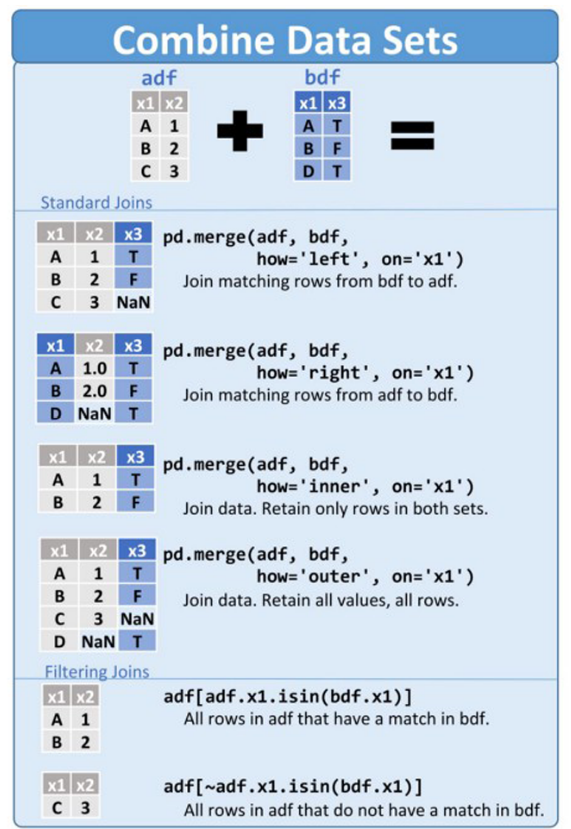

In [31]:
display(df.head(1))
display(b_code.head(1))

title                             addr1 eventstartdate  \
0  가족끼리 빙어체험 2021  경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터       20210116   

  eventenddate areacode cat1   cat2       cat3            mapx           mapy  \
0     20211231       31  A02  A0208  A02081300  127.6574135888  37.5145504080   

            tel  
0  031-775-5205

cat1   cat2       cat3 대분류    중분류   소분류
0  A01  A0101  A01010100  자연  자연관광지  국립공원

In [32]:
df_m=pd.merge(df,b_code, how='left')
df_m.head(3)

title                             addr1 eventstartdate  \
0  가족끼리 빙어체험 2021  경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터       20210116   
1   가평씽씽송어축제 2021             경기도 가평군 가평읍 가평제방길 119       20220101   
2      감악산 꽃&별 여행                  거창군 신원면 덕산리 산 57       20210924   

  eventenddate areacode cat1   cat2       cat3            mapx           mapy  \
0     20211231       31  A02  A0208  A02081300  127.6574135888  37.5145504080   
1     20220220       31  A02  A0207  A02070200  127.5174061076  37.8258616779   
2     20211017       36  A02  A0207  A02070200  127.9163995903  35.5912836573   

            tel           대분류    중분류   소분류  
0  031-775-5205  인문(문화/예술/역사)  공연/행사  기타행사  
1  031-581-6423  인문(문화/예술/역사)     축제  일반축제  
2  055-940-3390  인문(문화/예술/역사)     축제  일반축제

In [33]:
df_m.shape

(1000, 14)

In [34]:
소분류별=df_m.groupby('소분류').count()['title']
소분류별

소분류
기타행사      103
대중콘서트       3
문화관광축제     27
뮤지컬         6
박람회        40
스포츠경기       1
연극          6
오페라         2
일반축제      765
전통공연       12
컨벤션        30
클래식음악회      3
Name: title, dtype: int64

In [35]:
소분류별=소분류별.sort_values(ascending=False)
소분류별

소분류
일반축제      765
기타행사      103
박람회        40
컨벤션        30
문화관광축제     27
전통공연       12
뮤지컬         6
연극          6
대중콘서트       3
클래식음악회      3
오페라         2
스포츠경기       1
Name: title, dtype: int64

<AxesSubplot:xlabel='소분류'>

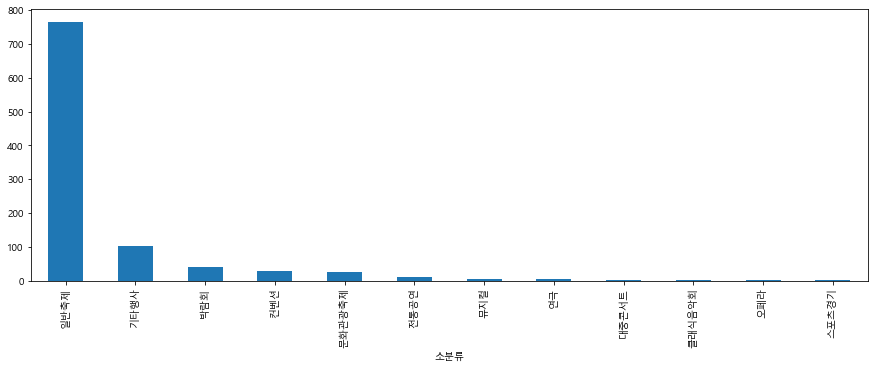

In [36]:
소분류별.plot(kind='bar',figsize=(15,5))